In [19]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.data import coins
from skimage.filters import threshold_otsu
from skimage.segmentation import clear_border
from skimage.morphology import closing, square
from skimage.measure import regionprops, label
from skimage.color import lab2rgb
%matplotlib inline

In [20]:
#import skimage
#help(skimage)

In [9]:
def show(img, cmap=None):
    cmap = cmap or plt.cm.gray
    plt.imshow(img, cmap=cmap)
    plt.axis('off')
    plt.show()

In [10]:
img = coins()

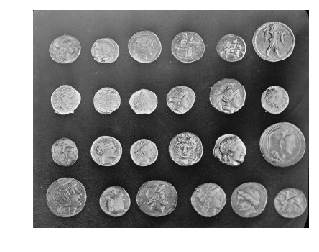

In [11]:
show(img)

In [21]:
threshold_otsu(img)

107

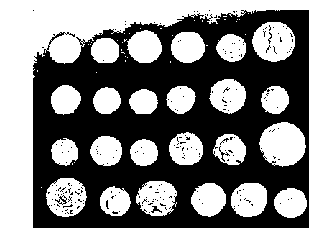

In [22]:
show(img>107)

In [27]:
from IPython.html import widgets

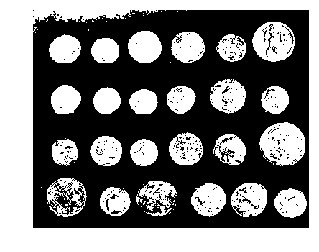

In [31]:
@widgets.interact(t=(10,240))
def threshold(t):
    show(img>t)

In [32]:
img_bin = clear_border(closing(img>120, square(5)))

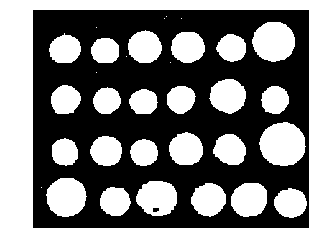

In [34]:
show(img_bin)

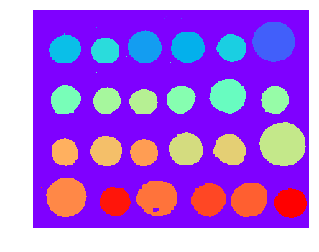

In [71]:
labels = label(img_bin, connectivity=img_bin.ndim)
show(labels, cmap=plt.cm.rainbow)

In [93]:
props = regionprops(labels)
boxes = np.array([p['BoundingBox'] for p in props if p['Area'] > 100])

In [94]:
boxes

array([[ 16, 305,  72, 365],
       [ 28, 132,  74, 179],
       [ 30, 192,  73, 240],
       [ 32,  22,  74,  67],
       [ 34, 255,  72, 297],
       [ 39,  81,  74, 120],
       [ 96, 245, 144, 296],
       [104,  25, 145,  67],
       [105, 186, 144, 227],
       [106, 317, 145, 356],
       [107,  84, 145, 122],
       [110, 134, 145, 174],
       [156, 315, 217, 380],
       [170, 189, 216, 237],
       [172, 251, 216, 297],
       [175,  80, 217, 124],
       [178,  26, 217,  63],
       [179, 135, 217, 174],
       [233,  18, 288,  75],
       [237, 144, 287, 201],
       [240, 276, 288, 326],
       [241, 220, 288, 269],
       [246,  93, 287, 136],
       [248, 336, 289, 381]])

In [95]:
print("There are {0:d} coins." .format(len(boxes)))

There are 24 coins.


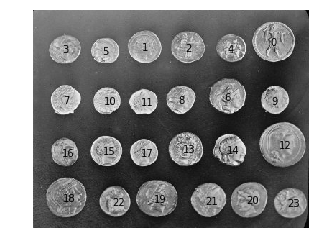

In [96]:
plt.imshow(img, cmap=plt.cm.gray)
plt.axis('off')
xs = boxes[:,[1,3]].mean(axis=1)
ys = boxes[:,[0,2]].mean(axis=1)
for i, box in enumerate(boxes):
    plt.text(xs[i]-5, ys[i]+5, str(i))